# Kuis 2
### Innama Maesa Putri - 3F- 16

## Load Dataset

In [47]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [2]:
df_dir = 'images/'

In [3]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = dir.name
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [4]:
df = load_dataset(df_dir)

In [5]:
# Function to Visualize
def img_viz(img_list, num_img):

    img = img_list[num_img][0]
    label = img_list[num_img][1]

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (224, 224, 3)
Label	: Bean


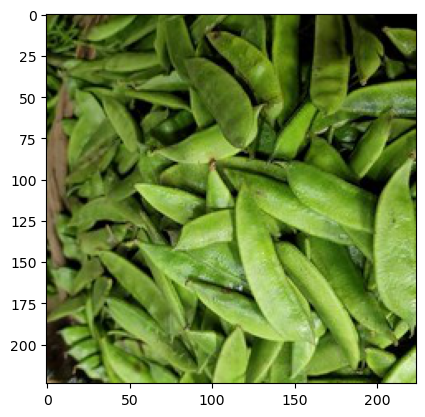

In [7]:
img_viz(df, 22)

## Proses Pra Pengolahan Data

In [54]:
def apply_greyscale(img_list):
    grey_result = []

    for img, label in img_list:
        grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grey_result.append((grey_img, label))
    
    return grey_result

In [55]:
grey_result = apply_greyscale(df)

Shape	: (224, 224)
Label	: Bean


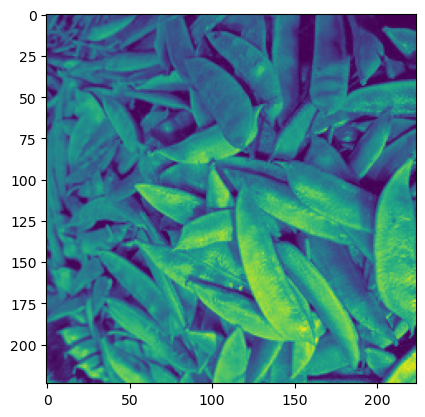

In [56]:
img_viz(grey_result, 22)

In [63]:
from tqdm import tqdm

def apply_clahe(batch):
    processed = []
    for img, label in tqdm(batch, desc="CLAHE"):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(img)  # img sudah grayscale
        processed.append((cl, label))
    return processed

In [64]:
clahe_result = apply_clahe(grey_result)

CLAHE: 100%|██████████| 15000/15000 [00:01<00:00, 10956.02it/s]


Shape	: (224, 224)
Label	: Bean


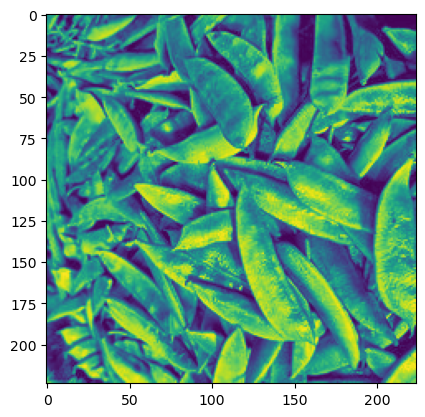

In [65]:
img_viz(clahe_result, 22)

In [69]:
imgs = [img for img, lbl in df]
labels = [lbl for img, lbl in df]

## Ekstraksi Fitur

In [118]:
from tqdm import tqdm

def extract_sift_features(images):
    sift = cv2.SIFT_create()
    feats = []
    for gray, _ in tqdm(images, desc="Ekstraksi SIFT"):
        kp, des = sift.detectAndCompute(gray, None)
        if des is None:
            des = np.zeros((1, 128))
        feat = np.mean(des, axis=0)
        feats.append(feat)

    return np.array(feats)

In [119]:
features = extract_sift_features(clahe_result)

Ekstraksi SIFT: 100%|██████████| 15000/15000 [22:39<00:00, 11.03it/s]


In [98]:
features

array([[16.352942  , 21.235294  , 21.705883  , ...,  1.4705882 ,
         0.47058824, 13.705882  ],
       [30.132948  , 17.566475  , 12.855492  , ..., 16.410404  ,
         7.7398844 , 16.68786   ],
       [23.09836   , 24.729507  , 20.09836   , ...,  6.803279  ,
         6.5491805 , 17.450819  ],
       ...,
       [24.73      , 34.66      , 30.73      , ...,  6.64      ,
         8.        , 16.79      ],
       [25.463211  , 23.827759  , 19.138796  , ..., 13.23913   ,
        11.91806   , 15.361204  ],
       [20.766315  , 20.421053  , 15.698947  , ..., 11.452632  ,
         8.568421  , 12.781053  ]], shape=(15000, 128), dtype=float32)

## Reduksi Dimensi

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # mempertahankan 95% informasi
feats_pca = pca.fit_transform(features)

In [100]:
feats_pca

array([[ 1.6782164e+02, -4.5132725e+01,  4.1834179e+01, ...,
         2.2101974e+00, -5.5757046e-02, -9.0536499e-01],
       [ 5.9345757e+01,  1.4327947e+01, -1.6344712e+00, ...,
        -8.5987854e-01,  3.6085668e+00,  9.7019196e-01],
       [ 8.7092606e+01, -1.9994492e+01,  1.6463814e+01, ...,
        -1.8354568e+00, -7.2427073e+00, -9.2330170e-01],
       ...,
       [ 2.4091587e+01, -5.6393169e+01,  3.5538761e+01, ...,
        -4.2101822e+00, -6.3573351e+00, -3.8397522e+00],
       [ 3.3341613e+00,  1.1664344e+01,  1.0828081e+01, ...,
        -3.8299561e-02,  8.1240129e-01, -2.7345428e+00],
       [ 1.7677839e+01,  6.8657980e+00,  1.2485026e+01, ...,
        -6.7141876e+00, -3.2765007e-01, -3.1097794e+00]],
      shape=(15000, 28), dtype=float32)

In [101]:
final_dataset = list(zip(feats_pca, labels))

In [102]:
final_dataset

[(array([ 1.6782164e+02, -4.5132725e+01,  4.1834179e+01,  5.9315805e+00,
         -3.3524303e+01, -9.7177238e+00,  1.7451294e+01,  4.3947010e+00,
          3.0204391e+00,  2.4904888e+01,  1.1653587e+01,  2.6696854e+00,
          3.2425385e+00, -7.2851028e+00,  8.6744289e+00, -8.8668404e+00,
         -7.8506470e+00,  1.4465332e-01, -9.5213013e+00, -9.2246819e+00,
         -2.8193855e-01, -1.1326010e+01, -8.0790730e+00, -7.5133312e-01,
         -5.9006338e+00,  2.2101974e+00, -5.5757046e-02, -9.0536499e-01],
        dtype=float32),
  'Bean'),
 (array([ 59.345757  ,  14.327947  ,  -1.6344712 ,  -8.732374  ,
          16.25256   , -10.8017235 ,  -5.0486755 ,   4.8855133 ,
          13.718147  ,  11.137955  ,   3.0039978 ,   2.5063705 ,
          -8.525558  ,  -3.5189972 ,   4.487131  ,  -4.2026405 ,
          -9.333736  ,   2.1275482 ,   0.5905075 ,   2.5738792 ,
          -5.0702906 ,   2.9759827 ,  -2.980953  ,   1.1935041 ,
           1.7887878 ,  -0.85987854,   3.6085668 ,   0.97019196

In [120]:
dataframe_ekstraksi = pd.DataFrame(final_dataset)
dataframe_ekstraksi.columns = ['Features', 'Label']

In [121]:
dataframe_ekstraksi

,Features,Label
0,"[167.82164, -45.132725, 41.83418, 5.9315805, -...",Bean
1,"[59.345757, 14.327947, -1.6344712, -8.732374, ...",Bean
2,"[87.092606, -19.994492, 16.463814, -7.468025, ...",Bean
3,"[91.8544, 12.906695, 36.879814, -10.981684, 18...",Bean
4,"[112.24741, -39.85993, 27.592705, 4.2838078, -...",Bean
...,...,...
14995,"[-0.4284191, 2.9638863, 10.769978, -2.0142493,...",Tomato
14996,"[68.5188, 42.756107, -9.939897, -1.9984035, -2...",Tomato
14997,"[24.091587, -56.39317, 35.53876, 72.56536, 26....",Tomato
14998,"[3.3341613, 11.664344, 10.828081, -4.0071993, ...",Tomato


In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(np.vstack(dataframe_ekstraksi['Features']))

In [153]:
scaled_features

array([[ 5.179889  , -2.444114  ,  2.3428838 , ...,  0.9097037 ,
        -0.02399692, -0.39907378],
       [ 1.8317344 ,  0.7759106 , -0.09153667, ..., -0.35382918,
         1.5553303 ,  0.42771602],
       [ 2.688153  , -1.0827817 ,  0.9220406 , ..., -0.75534207,
        -3.1215796 , -0.4069807 ],
       ...,
       [ 0.7435995 , -3.0539103 ,  1.990315  , ..., -1.7326936 ,
        -2.7399833 , -1.692621  ],
       [ 0.10291259,  0.63166624,  0.6064167 , ..., -0.01569682,
         0.35018018, -1.2054186 ],
       [ 0.54563636,  0.3718065 ,  0.6992124 , ..., -2.763252  ,
        -0.1411831 , -1.3708317 ]], shape=(15000, 28), dtype=float32)

## Split Data

In [220]:
X = feats_pca
y = dataframe_ekstraksi['Label'].values

In [192]:
X

array([[ 1.6782164e+02, -4.5132725e+01,  4.1834179e+01, ...,
         2.2101974e+00, -5.5757046e-02, -9.0536499e-01],
       [ 5.9345757e+01,  1.4327947e+01, -1.6344712e+00, ...,
        -8.5987854e-01,  3.6085668e+00,  9.7019196e-01],
       [ 8.7092606e+01, -1.9994492e+01,  1.6463814e+01, ...,
        -1.8354568e+00, -7.2427073e+00, -9.2330170e-01],
       ...,
       [ 2.4091587e+01, -5.6393169e+01,  3.5538761e+01, ...,
        -4.2101822e+00, -6.3573351e+00, -3.8397522e+00],
       [ 3.3341613e+00,  1.1664344e+01,  1.0828081e+01, ...,
        -3.8299561e-02,  8.1240129e-01, -2.7345428e+00],
       [ 1.7677839e+01,  6.8657980e+00,  1.2485026e+01, ...,
        -6.7141876e+00, -3.2765007e-01, -3.1097794e+00]],
      shape=(15000, 28), dtype=float32)

In [221]:
from sklearn.model_selection import train_test_split

X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y,
    test_size=0.30,
    random_state=0,
    stratify=y
)

In [237]:
X_train_70.shape, y_train_70.shape, X_test_30.shape, y_test_30.shape

((10500, 28), (10500,), (4500, 28), (4500,))

In [222]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y,
    test_size=0.20,
    random_state=0,
    stratify=y
)

In [238]:
X_train_80.shape, y_train_80.shape, X_test_20.shape, y_test_20.shape

((12000, 28), (12000,), (3000, 28), (3000,))

In [223]:
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(
    X, y,
    test_size=0.10,
    random_state=0,
    stratify=y
)

In [239]:
X_train_90.shape, y_train_90.shape, X_test_10.shape, y_test_10.shape

((13500, 28), (13500,), (1500, 28), (1500,))

In [224]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [240]:
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    print(f"Fold {fold}:")
    print(f"  Train samples: {len(train_index)}")
    print(f"  Test samples:  {len(test_index)}")

Fold 1:
  Train samples: 12000
  Test samples:  3000
Fold 2:
  Train samples: 12000
  Test samples:  3000
Fold 3:
  Train samples: 12000
  Test samples:  3000
Fold 4:
  Train samples: 12000
  Test samples:  3000
Fold 5:
  Train samples: 12000
  Test samples:  3000


## Pembuatan Model

In [243]:
splits = {
    "30": (X_train_70, X_test_30, y_train_70, y_test_30),
    "20": (X_train_80, X_test_20, y_train_80, y_test_20),
    "10": (X_train_90, X_test_10, y_train_90, y_test_10)
}

In [226]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    return {
        "train_accuracy": accuracy_score(y_train, pred_train),
        "test_accuracy": accuracy_score(y_test, pred_test),
        "precision": precision_score(y_test, pred_test, average='weighted'),
        "recall": recall_score(y_test, pred_test, average='weighted'),
        "f1": f1_score(y_test, pred_test, average='weighted'),
    }


In [283]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle

def build_svm(Xtr, ytr, Xts, yts, split_name):
    svm = SVC(kernel='rbf', C=10, gamma='scale')
    svm.fit(Xtr, ytr)

    result = evaluate(svm, Xtr, Xts, ytr, yts)

    # tambah info model
    result["model_object"] = svm
    result["split"] = split_name
    return result

In [298]:
from sklearn.neighbors import KNeighborsClassifier

def build_knn(Xtr, ytr, Xts, yts, split_name):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(Xtr, ytr)

    result = evaluate(knn, Xtr, Xts, ytr, yts)
    result["model_object"] = knn
    result["split"] = split_name
    return result


In [299]:
from sklearn.naive_bayes import GaussianNB

def build_nb(Xtr, ytr, Xts, yts, split_name):
    nb = GaussianNB()
    nb.fit(Xtr, ytr)

    result = evaluate(nb, Xtr, Xts, ytr, yts)
    result["model_object"] = nb
    result["split"] = split_name
    return result

In [300]:
models_30 = {}
models_20 = {}
models_10 = {}

for split_name, (Xtr, Xts, ytr, yts) in splits.items():

    print(f"\n=== Membuat model untuk split {split_name}% ===")

    if split_name == "30":
        models_30["svm"] = build_svm(Xtr, ytr, Xts, yts, "30")
        models_30["knn"] = build_knn(Xtr, ytr, Xts, yts, "30")
        models_30["nb"]  = build_nb (Xtr, ytr, Xts, yts, "30")

    elif split_name == "20":
        models_20["svm"] = build_svm(Xtr, ytr, Xts, yts, "20")
        models_20["knn"] = build_knn(Xtr, ytr, Xts, yts, "20")
        models_20["nb"]  = build_nb (Xtr, ytr, Xts, yts, "20")

    elif split_name == "10":
        models_10["svm"] = build_svm(Xtr, ytr, Xts, yts, "10")
        models_10["knn"] = build_knn(Xtr, ytr, Xts, yts, "10")
        models_10["nb"]  = build_nb (Xtr, ytr, Xts, yts, "10")



=== Membuat model untuk split 30% ===

=== Membuat model untuk split 20% ===

=== Membuat model untuk split 10% ===


In [301]:
import pickle

def save_all_models(model_dict, prefix):
    for name, model in model_dict.items():
        filename = f"{prefix}_{name}.pkl"
        pickle.dump(model["model"], open(filename, "wb"))
        print(f"✔ Model {prefix}_{name} disimpan.")

In [302]:
def collect_results(models_dict, split_name):
    rows = []
    for clf_name, result in models_dict.items():
        rows.append({
            "Split": split_name,
            "Model": clf_name.upper(),
            "Train Accuracy": result["train_accuracy"],
            "Test Accuracy": result["test_accuracy"],
            "Precision": result["precision"],
            "Recall": result["recall"],
            "F1": result["f1"]
        })
    return rows

In [303]:
all_results = []
all_results += collect_results(models_30, "30")
all_results += collect_results(models_20, "20")
all_results += collect_results(models_10, "10")

df_results = pd.DataFrame(all_results)
df_results


,Split,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,30,SVM,0.965714,0.896000,0.895743,0.896000,0.895357
1,30,KNN,0.902762,0.858000,0.862283,0.858000,0.857031
2,30,NB,0.597048,0.594889,0.624687,0.594889,0.588453
3,20,SVM,0.966167,0.903333,0.903368,0.903333,0.902879
4,20,KNN,0.906417,0.859667,0.863491,0.859667,0.858430
5,20,NB,0.598333,0.598333,0.620202,0.598333,0.590648
6,10,SVM,0.967185,0.912000,0.911950,0.912000,0.911145
7,10,KNN,0.909556,0.875333,0.878688,0.875333,0.873515
8,10,NB,0.598444,0.601333,0.624358,0.601333,0.592653


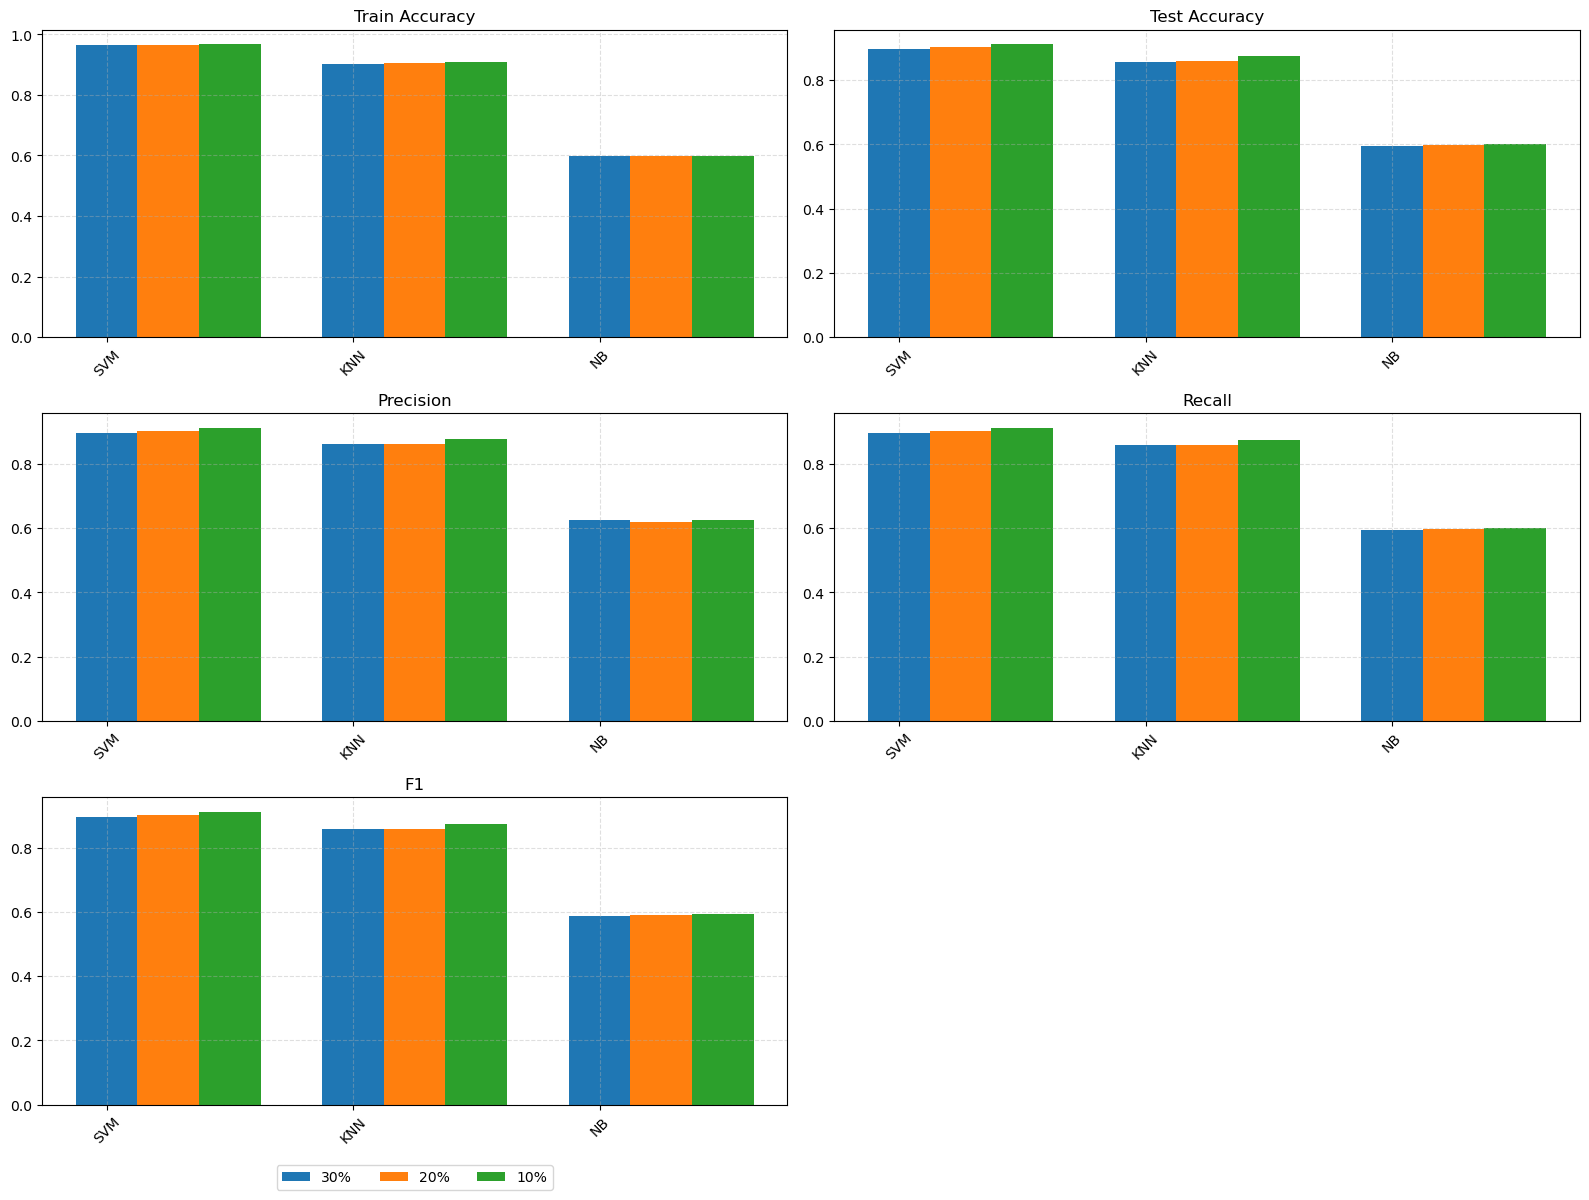

In [304]:
metrics = ["Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1"]

plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)

    width = 0.25
    splits = df_results["Split"].unique()
    
    for idx, split in enumerate(splits):
        subset = df_results[df_results["Split"] == split]
        x = np.arange(len(subset))
        plt.bar(x + idx * width, subset[metric], width=width, label=f"{split}%")

    plt.title(metric)
    plt.xticks(np.arange(len(subset)), subset["Model"], rotation=45)
    plt.grid(True, linestyle="--", alpha=0.4)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.tight_layout()
plt.show()
